# **1. Persiapan Dataset**

**1. Import Library**

In [44]:
# Memasukan Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HAMBA
[nltk_data]     ELEKTRONIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**2. Import Dataset**

In [46]:
# Memasukan Dataset
data = pd.read_csv('Dataset_Berita.csv')
data.head(5)

,headline,date,link,content,label
0,[SALAH] Hanya Gibran yang Memakai Microphone y...,"Januari 4, 2024",https://turnbackhoax.id/2024/01/04/salah-hanya...,Hasil Periksa Fakta Luthfiyah OJ (UIN Raden Ma...,0
1,[SALAH] Video Jokowi Menyaksikan Debat Cawapres,"Januari 3, 2024",https://turnbackhoax.id/2024/01/03/salah-video...,Hasil periksa fakta Dyah FebriyaniVideo terseb...,0
2,[SALAH] “Cadas pangeran longsor baru saja keja...,"Januari 3, 2024",https://turnbackhoax.id/2024/01/03/salah-cadas...,"MENYESATKAN, mengeksploitasi peristiwa yang se...",0
3,[SALAH] Najwa Shihab Diteror Usai Komentari Vi...,"Januari 2, 2024",https://turnbackhoax.id/2024/01/02/salah-najwa...,Hasil periksa fakta ‘Ainayya Al Fatikhah.Ungga...,0
4,[SALAH] Ombak Mirip Tsunami Sapu Bersih Tempat...,"Januari 2, 2024",https://turnbackhoax.id/2024/01/02/salah-ombak...,Hasil periksa fakta ‘Ainayya Al Fatikhah.Ungga...,0


**3. Mengambil data yg di butuh kan untuk preprocessing**

In [47]:
# Mengambil data yg di butuh kan untuk preprocessing
df = pd.DataFrame(data[['content','label']]);

**4. Mengecek Tabel**

In [48]:
# mengecek jumlah kolom dan baris
print('Jumlah kolom dan baris\t\t : ')
print(df.shape,'\n')

# mengecek jumlah Berita salah(0) dan Berita Benar(1)
print('Jumlah berita salah dan benar\t : ')
print(df['label'].value_counts(),'\n')

# mengecek jumlah Data yg kosong
print('Jumlah data yg kosong\t\t : ')
print(df.isnull().sum())

Jumlah kolom dan baris		 : 
(2075, 2) 

Jumlah berita salah dan benar	 : 
label
1    1038
0    1037
Name: count, dtype: int64 

Jumlah data yg kosong		 : 
content    0
label      0
dtype: int64


**5. visualisasi perbandingan Dataset salah dan benar**

Text(0.5, 1.0, 'Dataset label distribuition')

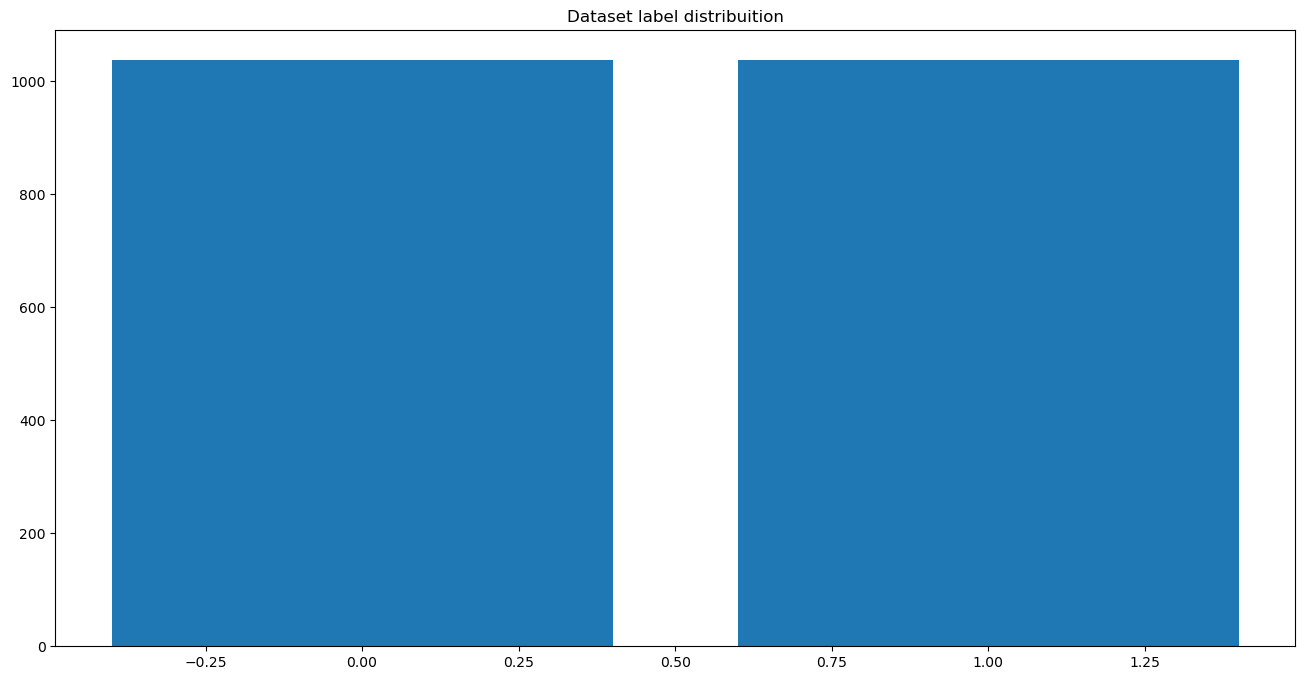

In [49]:
# Visualisasi jumlah label untuk keseimbangan
from collections import Counter

label_cnt = Counter(df.label)
plt.figure(figsize =(16,8))
plt.bar(label_cnt.keys(),label_cnt.values())
plt.title('Dataset label distribuition')

# **2. Teks Preprocessing**

**1. CaseFolding**

In [50]:
import re

# Membuat Fungsi CaseFolding
def casefolding(text):
  text = text.lower()                                   # Mengubah huruf kecil
  text = re.sub(r'\$\w*', ' ', text)                     # Menghapus tanda Mata uang
  text = re.sub(r'https?://\S+|www\.\s+', ' ', text)     # Menghapus hyperlinks
  text = re.sub(r'#', ' ', text)                         # Menghapus tanda hash #
  text = re.sub(r',',' ',text)                           # Menghapus koma
  text = re.sub(r'[-+]?[0-9]+', ' ', text)                # Menghapus angka
  text = re.sub(r'[^\w\s]', ' ', text)
  text = text.strip()                                   # menghapus spasi berlebih dan karakter
  return text

**2. Normalisasi Teks**

In [51]:
key_norm = pd.read_csv('key_norm.csv')

# Membuat Fungsi Normalisasi Teks
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
  if (key_norm['singkat'] == word).any()
  else word for word in text.split()
  ])

  text = str.lower(text)
  return text

**3. Filtering(Stopword Removal)**

In [52]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_indonesia = stopwords.words('indonesian')

# Membuat fungsi Stopword Removal
more_stopword = []
stopwords_indonesia = stopwords_indonesia + more_stopword

def remove_stopword(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_indonesia:
      clean_words.append(word)
  return " ".join(clean_words)

**4. Stemming**

In [53]:
# Menginstall Sastrawi
!pip -q install sastrawi

In [54]:
# Merubah Kata menjadi Kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat Fungsi untuk Stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [55]:
# Melakukan Percobaan pada fungsi Preprocessing
Raw_data = df['content'].iloc[1890]
case_folding = casefolding(Raw_data)
teks_normal = text_normalize(case_folding)
stopword = remove_stopword(teks_normal)
text_stemming = stemming(stopword)

print('Raw data\t : ', Raw_data)
print('Case Folding\t : ', case_folding)
print('Teks Normatlize\t : ', teks_normal)
print('Stopword\t : ', stopword)
print('Stemming\t : ', text_stemming)

Abdul mengatakan, jika benar pakta integritas itu ada, menurutnya, akan membahayakan demokrasi. Dia menyebutkan hal itu adalah tindakan yang mengistimewakan."Jika memang benar peristiwa tersebut ada, maka demikian itu adalah tindakan yang membahayakan bagi demokrasi. Substansi Pakta Integritas tersebut menunjukkan adanya tindakan mengistimewakan dengan menjamin pemenangan," tutur dia.Menurut Abdul, perbuatan itu tidak bisa dibenarkan secara hukum. Dia juga menyinggung soal permufakatan jahat."Kedua belah pihak yang menandatangani Pakta Integritas jika benar adanya, maka pada keduanya terdapat perjumpaan kehendak. Meminjam istilah pidana, dalam kondisi demikian terdapat pemufakatan jahat (dolus premeditatus). Demikian itu merupakan perbuatan yang tidak dapat dibenarkan secara hukum," sebut dia.Lebih lanjut, Abdul menegaskan ASN harus netral serta harus menjaga integritas kompetisi politik."ASN harus netral dan menjaga integritas kompetisi politik. Sangat memalukan dan tentu dipandang te

**5. Text Processing Pipeline**

In [56]:
# Membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopword(text)
  text = stemming(text)
  return text

In [57]:
# Eksekusi fungsi preprocessing
df['clean_text'] = df['content'].apply(text_preprocessing)

In [58]:
# Memasukan data kedalam file csv
df.to_csv('clean_data.csv')

# **3. Feature Engineering**

In [59]:
# Pisahkan kolom feature dan target
x = df['clean_text']
y = df['label']

**1. Feature Extraction(Tf-Idf & N-Gram)**

In [60]:
# Save Model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_, open('Feature_tf-idf.sav', 'wb'))

In [61]:
# Menampilkan Vocabulary dari tf-idf
vec_TF_IDF.vocabulary_

{'hasil': 5644,
 'periksa': 11820,
 'fakta': 4484,
 'luthfiyah': 8971,
 'oj': 11020,
 'uin': 16549,
 'raden': 12701,
 'mas': 9360,
 'said': 13597,
 'surakarta': 15267,
 'klaim': 7833,
 'gibran': 5176,
 'pakai': 11269,
 'microphone': 9869,
 'pegang': 11641,
 'debat': 3258,
 'cawapres': 2622,
 'tiga': 16031,
 'mikrofon': 9890,
 'skin': 14630,
 'tone': 16203,
 'countryman': 2998,
 'clip': 2861,
 'on': 11072,
 'bodypack': 2141,
 'tangan': 15600,
 'whm': 17181,
 'lengkap': 8676,
 'jelas': 6830,
 'kategori': 7383,
 'konten': 8068,
 'sesat': 14259,
 'sumber': 15171,
 'tiktok': 16039,
 'microphine': 9868,
 'lekat': 8640,
 'dialihfungsikan': 3507,
 'alat': 402,
 'bantu': 1528,
 'dengarsilahkan': 3361,
 'teriak': 15882,
 'hoax': 5867,
 'akun': 373,
 'facebook': 4438,
 'roger': 13331,
 'silalahi': 14454,
 'official': 11004,
 'memposting': 9604,
 'gambar': 4901,
 'foto': 4780,
 'nomor': 10790,
 'postingan': 12221,
 'alih': 453,
 'fungsi': 4839,
 'dengar': 3360,
 'telusur': 15797,
 'banding': 1475,

In [62]:
# Melihat Jumlah Fitur
print(len(vec_TF_IDF.get_feature_names_out()))

17593


In [63]:
# Melihat Fitur yang ada didalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aaauuuu' 'aaauuuuu' ... 'zulkarnainsekretaris' 'zulkifli' 'zuyyina']


In [64]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns = vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aaauuuu,aaauuuuu,aaib,aam,aamiiin,aamiin,aamin,aas,ab,...,zul,zuldhadril,zulfa,zulfikar,zulhadril,zulhas,zulhasril,zulkarnainsekretaris,zulkifli,zuyyina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**2. Feature Selection**

In [65]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 3000)
x_kbest_features =chi2_features.fit_transform(x_train, y_train)

# untuk Reduce Feature
print('Original Feature Number', x_train.shape[1])
print('Reduce Feature Number', x_kbest_features.shape[1])

Original Feature Number 17593
Reduce Feature Number 3000


In [67]:
Data = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
Data

,Nilai
0,0.374795
1,0.069816
2,0.069816
3,0.213819
4,0.075914
...,...
17588,4.078311
17589,0.112443
17590,0.012945
17591,0.070598


In [68]:
# menampilkan Feature beserta nilainya
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.374795,aa
1,0.069816,aaauuuu
2,0.069816,aaauuuuu
3,0.213819,aaib
4,0.075914,aam
...,...,...
17588,4.078311,zulhas
17589,0.112443,zulhasril
17590,0.012945,zulkarnainsekretaris
17591,0.070598,zulkifli


In [69]:
# Mengurutkan nilai Feature terbaik
Data.sort_values(by = 'Nilai', ascending = False)

,Nilai,Fitur
16873,6.149697e+01,video
8068,3.754792e+01,konten
16645,3.620606e+01,unggah
7833,3.427434e+01,klaim
373,3.268366e+01,akun
...,...,...
5550,5.775511e-07,handheld
11012,3.164221e-07,ogah
12622,1.520556e-07,putera
2900,1.405172e-08,colek


In [70]:
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [71]:
# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yg sudah di tetapkan chi square
new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['aamiin',
 'ababil',
 'abadi',
 'abar',
 'abu',
 'abuya',
 'ac',
 'acak',
 'acara',
 'ace',
 'adegan',
 'aden',
 'adi',
 'adib',
 'adil',
 'adu',
 'advertising',
 'advokasi',
 'advokat',
 'adwan',
 'aedes',
 'aegypti',
 'aeon',
 'afif',
 'afiliasi',
 'afp',
 'africa',
 'afrika',
 'aga',
 'agam',
 'agama',
 'agenda',
 'agnes',
 'agu',
 'agung',
 'agus',
 'agustiar',
 'agustina',
 'agustus',
 'ahok',
 'ahy',
 'aibon',
 'aidil',
 'aidit',
 'aids',
 'aiman',
 'ainayya',
 'airlangga',
 'ajak',
 'ajang',
 'ajinomoto',
 'ajman',
 'akar',
 'akibat',
 'aklamasi',
 'akrab',
 'akronim',
 'aksi',
 'aktor',
 'aktual',
 'aku',
 'akun',
 'al',
 'alam',
 'alas',
 'alat',
 'alhamdulillah',
 'ali',
 'alir',
 'alissa',
 'aljazair',
 'alkohol',
 'allah',
 'almas',
 'aluminium',
 'alumni',
 'aman',
 'amanah',
 'amanat',
 'amazon',
 'ambar',
 'ambil',
 'ambrol',
 'ambulans',
 'america',
 'american',
 'amerika',
 'amichai',
 'amin',
 'aminuddin',
 'amnesti',
 'ampi',
 'amplop',
 'amran',
 'amuk',
 'amungkas

In [72]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
new_selected_feature = {}

for(k, v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_feature :
    new_selected_feature[k]=v

new_selected_feature

{'hasil': 5644,
 'periksa': 11820,
 'fakta': 4484,
 'luthfiyah': 8971,
 'oj': 11020,
 'uin': 16549,
 'raden': 12701,
 'mas': 9360,
 'surakarta': 15267,
 'klaim': 7833,
 'gibran': 5176,
 'microphone': 9869,
 'pegang': 11641,
 'debat': 3258,
 'cawapres': 2622,
 'tiga': 16031,
 'on': 11072,
 'lengkap': 8676,
 'jelas': 6830,
 'kategori': 7383,
 'konten': 8068,
 'sesat': 14259,
 'sumber': 15171,
 'tiktok': 16039,
 'alat': 402,
 'akun': 373,
 'facebook': 4438,
 'official': 11004,
 'memposting': 9604,
 'gambar': 4901,
 'foto': 4780,
 'nomor': 10790,
 'postingan': 12221,
 'fungsi': 4839,
 'dengar': 3360,
 'telusur': 15797,
 'banding': 1475,
 'jumat': 7010,
 'desember': 3420,
 'cak': 2491,
 'imin': 6171,
 'mahfud': 9054,
 'video': 16873,
 'kanal': 7214,
 'youtube': 17452,
 'kompastv': 7963,
 'judul': 6992,
 'muhaimin': 10212,
 'md': 9477,
 'pilpres': 11990,
 'menit': 9707,
 'informasi': 6301,
 'stasiun': 14918,
 'televisi': 15787,
 'selenggara': 14047,
 'bawa': 1664,
 'tuju': 16417,
 'antisipas

In [73]:
len(new_selected_feature)

3000

In [74]:
pickle.dump(new_selected_feature, open('new_selected_feature_tf-idf.sav', 'wb'))

In [75]:
# menampilkan fitur-fitur yang sudah di seleksi
data_selected_feature = pd.DataFrame(x_kbest_features, columns = selected_feature)
data_selected_feature

,aamiin,ababil,abadi,abar,abu,abuya,ac,acak,acara,ace,...,zalim,zaman,zara,zaytun,zelenskyy,ziarah,zita,zon,zudan,zulhas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.060495,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095398,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **4. Modeling**

In [76]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**1. Import Library**

In [77]:
#import library
import random
from sklearn.model_selection import train_test_split

**2. train & test split**

In [78]:
x = selected_x
y = df.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [79]:
# Menampilkan jumlah data training dan jumlah data testing
print('Banyaknya x_train : ', len(x_train))
print('Banyaknya x_test : ', len(x_test))
print('Banyaknya y_train : ', len(y_train))
print('Banyaknya y_test : ', len(y_test))

Banyaknya x_train :  1660
Banyaknya x_test :  415
Banyaknya y_train :  1660
Banyaknya y_test :  415


**3. Menyiapkan fungsi untuk proses modeling**

In [93]:
# Membuat model prediksi
data_input = ('pakar hukum tata negara abdul chair ramadhan pandang nyata cawapres mahfud md pakta integritas pj bupati sorong yan piet mosso menang ganjar pranowo hukum adul pakta integritas buat benar abdul chair demokrasi bebas intervensi milu bebas laku diskriminatif milu demokratis bebas intervensi intimidasi laku diskriminatif pakta integritas selidik validitas abdul wartawan jumat abdul pakta integritas turut bahaya demokrasi tindak istimewa peristiwa tindak bahaya demokrasi substansi pakta integritas tindak istimewa jamin menang abdul buat benar hukum singgung mufakat jahat belah menandatangani pakta integritas jumpa hendak pinjam istilah pidana kondisi mufakat jahat dolus premeditatus buat benar hukum abdul asn netral jaga integritas kompetisi politik asn netral jaga integritas kompetisi politik malu pandang cela asn tindak tindak tentang prinsip netralitas abdul kritisi nyata mahfud hukum pakta integritas lantar agustus tetap calon capres cawapres kpu abdul sebut hilang unsur langgar nyata pakta integritas tetap capres cawapres resmi kpu hilang unsur langgar pakta integritas tetap ganjar capres ganjar deklarasi capres pdip april hubung erat pisah addul harap bawaslu usut dokumen duga pakta integritas pj bupati sorong harap bawaslu yogia usut perkara telusur kait tindak struktur telusur ada libat pungkas edar media sosial dokumen duga pakta integritas dukung pj bupati sorong yan piet mosso menang ganjar milu sorot anggota komisi iii dpr fraksi partai demokrat pd benny k harman halo republik dokumen pakta integritas orang kena ott kpk tulis benny akun x nya senin tanda tangan kabinda papua barat dokumen jabat tukar guling politik oooh domine selamat negeri rakyatmonitor imbuh benny mahfud md komentar dokumen duga pakta integritas dukung pj bupati sorong yan piet mosso menang ganjar pranowo milu mahfud nilai hukum hukum ya biar mahfud md wartawan inews tower menteng jakarta pusat selasa menko polhukam komentar kait pakta integritas turut pakta integritas keluar agustus tetap capres cawapres hukum clear agustus calon calon resmi')
data_input = text_preprocessing(data_input)

# load data
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error='replace', vocabulary = set(pickle.load(open('new_selected_feature_tf-idf.sav', 'rb'))))

**4. Proses Modeling menggunakan algoritma Naive Bayes**

In [94]:
#import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB

# Proses Training menggunakan Naive Bayes
NB = MultinomialNB()
model_NB = NB.fit(x_train, y_train)

In [95]:
hasil_NB = model_NB.predict(loaded_vec.fit_transform([data_input]))

if(hasil_NB == 0):
  h_NB = 'Fake News'
elif(hasil_NB == 1):
  h_NB = 'Real News'

print('Hasil Prediksi\t : ', h_NB)

Hasil Prediksi	 :  Real News


In [96]:
# menyimpan Model
pickle.dump(model_NB, open('model_NB.sav', 'wb'))

**5. Proses Modeling menggunakan algoritma Naive Bayes**

In [97]:
#import algoritma naive bayes
from sklearn.svm import SVC

# Proses Training menggunakan Naive Bayes
SVM = SVC()
model_SVM = SVM.fit(x_train, y_train)

In [113]:
dense_data_input = loaded_vec.fit_transform([data_input]).toarray()

hasil_SVM = model_SVM.predict(dense_data_input)

if (hasil_SVM == 0):
    h_SVM = 'Fake News'
elif (hasil_SVM == 1):
    h_SVM = 'Real News'

print ('Hasil Prediksi\t : ', h_SVM)

Hasil Prediksi	 :  Real News


In [112]:
# Menyimpan Model
pickle.dump(model_SVM, open('model_SVM.sav', 'wb'))

# **5. Evaluasi Model**

**1. Import Library**

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**2. Evaluasi Model Naive Bayes**

In [107]:


predicted = model_NB.predict(x_test)

CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       207
           1       0.99      0.99      0.99       208

    accuracy                           0.99       415
   macro avg       0.99      0.99      0.99       415
weighted avg       0.99      0.99      0.99       415



**3. Evaluasi Model SVM**

In [108]:
predicted = model_SVM.predict(x_test)

CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       207
           1       1.00      0.99      1.00       208

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415

